In [1]:
words = open('names.txt').read().splitlines()
words

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn',
 'abigail',
 'emily',
 'elizabeth',
 'mila',
 'ella',
 'avery',
 'sofia',
 'camila',
 'aria',
 'scarlett',
 'victoria',
 'madison',
 'luna',
 'grace',
 'chloe',
 'penelope',
 'layla',
 'riley',
 'zoey',
 'nora',
 'lily',
 'eleanor',
 'hannah',
 'lillian',
 'addison',
 'aubrey',
 'ellie',
 'stella',
 'natalie',
 'zoe',
 'leah',
 'hazel',
 'violet',
 'aurora',
 'savannah',
 'audrey',
 'brooklyn',
 'bella',
 'claire',
 'skylar',
 'lucy',
 'paisley',
 'everly',
 'anna',
 'caroline',
 'nova',
 'genesis',
 'emilia',
 'kennedy',
 'samantha',
 'maya',
 'willow',
 'kinsley',
 'naomi',
 'aaliyah',
 'elena',
 'sarah',
 'ariana',
 'allison',
 'gabriella',
 'alice',
 'madelyn',
 'cora',
 'ruby',
 'eva',
 'serenity',
 'autumn',
 'adeline',
 'hailey',
 'gianna',
 'valentina',
 'isla',
 'eliana',
 'quinn',
 'nevaeh',
 'ivy',
 'sadie',
 'piper',
 'lydia',
 'alexa',
 'josephine',
 'emery',
 'julia'

In [3]:
import torch

In [4]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {s:i for i,s in stoi.items()}



In [5]:
bigram = torch.zeros((27,27), dtype=torch.int32)

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        bigram[ix1, ix2] += 1

In [7]:
P = (bigram+1).float()
P /= P.sum(dim=1, keepdim=True)

(-0.5, 26.5, 26.5, -0.5)

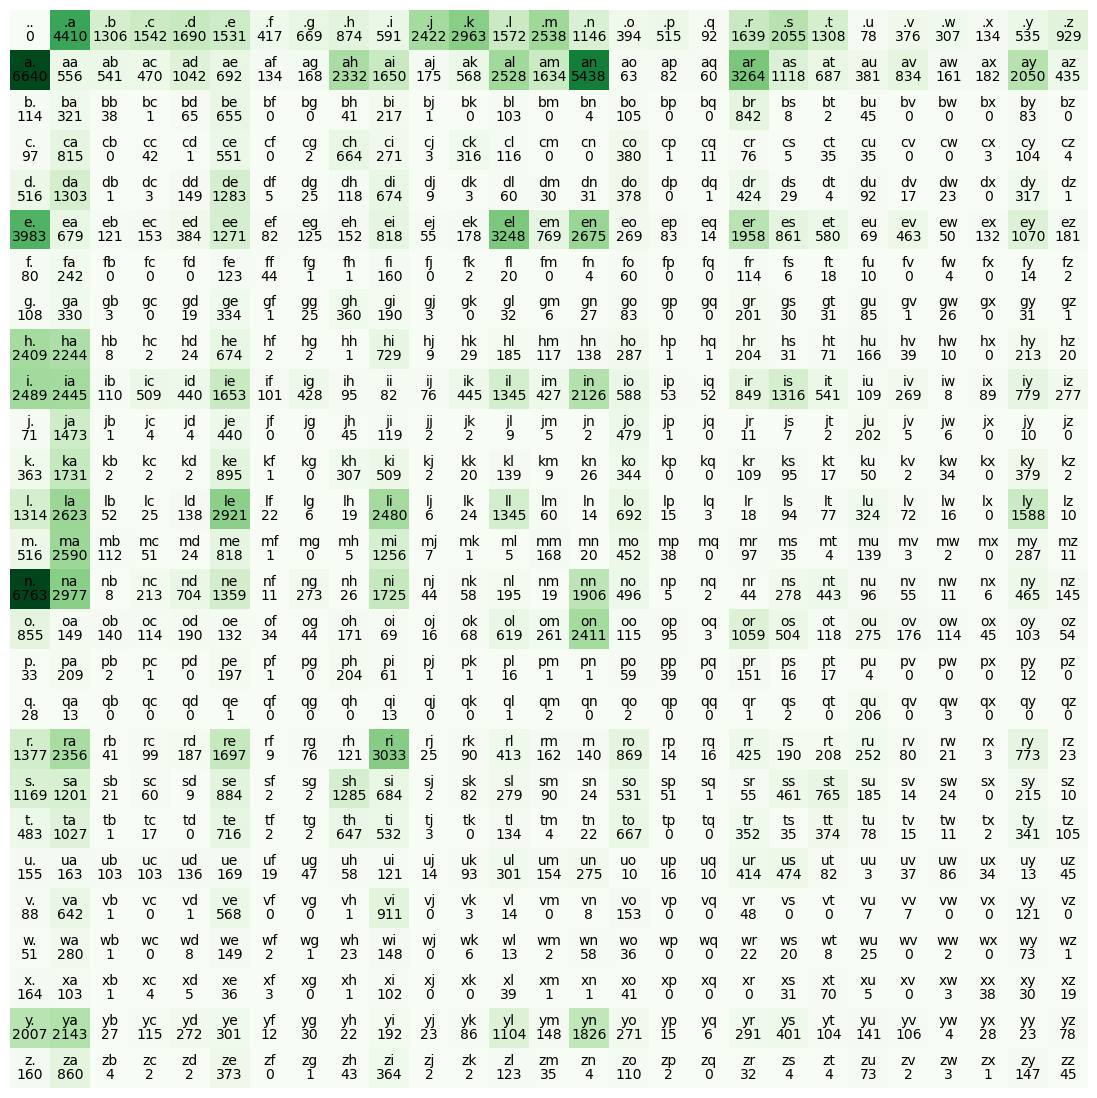

In [8]:
import matplotlib.pyplot as plt


plt.figure(figsize=(14,14))
plt.imshow(bigram, cmap='Greens')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color='black')
        plt.text(j, i, bigram[i,j].item(), ha='center', va='top', color='black')
plt.axis('off')

In [11]:
g = torch.Generator().manual_seed(2147483647)

for i in range(50):
    word = ''
    ix = 0
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        word += itos[ix]
        if ix == 0:
            break
    print(word[:-1])


mor
axx
minaymoryles
kondlaisah
anchshizarie
odaren
iaddash
h
jhinatien
egushl
h
br
a
jayn
ilemannariaenien
be
f
akiinela
trttanakeroruceyaaxatona
lamoynayrkiedengin
torrederahnn
ellovyllobrqura
ay
h
kn
jaieendenelele
kianu
eryly
zeeieil
kayvirgjusinn
r
t
rja
kronanurolin
din
elfr
dikie
s
elarieiavelvalllaish
eythann
janianaeri
ble
ckiree
l
adhanoena
naisaryan
sialaitalyee
cena
lisarr
bizyngor


In [13]:
log_likelihood = 0.0
n = 0

for w in ['casper']:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

.c: 0.0481 -3.0339
ca: 0.2293 -1.4728
as: 0.0330 -3.4113
sp: 0.0064 -5.0524
pe: 0.1880 -1.6711
er: 0.0958 -2.3455
r.: 0.1083 -2.2231
log_likelihood=tensor(-19.2102)
nll=tensor(19.2102)
2.744321346282959


In [14]:
### creation of input data and labels

xs, ys = [], []

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

print(f'{xs.shape=} {ys.shape=}')

xs.shape=torch.Size([5]) ys.shape=torch.Size([5])


In [15]:
import torch.nn.functional as F
g = torch.Generator().manual_seed(2147483647)



### generating random weight matrix for first and only layer

W = torch.randn((27,27), generator=g, requires_grad=True)



### forward pass

xenc = F.one_hot(xs, num_classes=27).float()        # encode inputs (integers) as 27d-vectors (floats)
logits = xenc @ W                                   # matrix multiplication of encoded input and weights -> shape=(5,27), for each input a whole pdf over all possible characters
counts = logits.exp()                               # forcing positive outputs by exp()
probs = counts / counts.sum(1, keepdim=True)        # normalizing to get probability density
loss = -probs[torch.arange(5), ys].log().mean()     # probabilities of label characters 


In [16]:
(xenc @ W).shape 

torch.Size([5, 27])

In [17]:
print(loss.item())

3.7693049907684326


In [18]:
#backward pass
W.grad = None
loss.backward()
W.grad

tensor([[ 0.0121,  0.0020,  0.0025,  0.0008,  0.0034, -0.1975,  0.0005,  0.0046,
          0.0027,  0.0063,  0.0016,  0.0056,  0.0018,  0.0016,  0.0100,  0.0476,
          0.0121,  0.0005,  0.0050,  0.0011,  0.0068,  0.0022,  0.0006,  0.0040,
          0.0024,  0.0307,  0.0292],
        [-0.1970,  0.0017,  0.0079,  0.0020,  0.0121,  0.0062,  0.0217,  0.0026,
          0.0025,  0.0010,  0.0205,  0.0017,  0.0198,  0.0022,  0.0046,  0.0041,
          0.0082,  0.0016,  0.0180,  0.0106,  0.0093,  0.0062,  0.0010,  0.0066,
          0.0131,  0.0101,  0.0018],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000

In [19]:
W.data += -0.1 * W.grad

In [20]:
print(loss.item())

3.7693049907684326
